## Assessing a diabetes prediction classifier

The goal is to predict whether or not each individual is likely to have diabetes based on the features body mass index (BMI) and age (in years). Therefore, it is a binary classification problem. A target value of 0 indicates that the individual does not have diabetes, while a value of 1 indicates that the individual does have diabetes.

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
diabetes_df = pd.read_csv("diabetes_clean.csv")

In [3]:
diabetes_df

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
X = diabetes_df[['bmi','age']].values
y = diabetes_df["diabetes"].values

In [5]:
X

array([[33.6, 50. ],
       [26.6, 31. ],
       [23.3, 32. ],
       ...,
       [26.2, 30. ],
       [30.1, 47. ],
       [30.4, 23. ]])

In [6]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [9]:
# Import confusion matrix
from sklearn.metrics import classification_report,confusion_matrix

knn = KNeighborsClassifier(n_neighbors=6)

In [10]:
# Fit the model to the training data
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [11]:
# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [12]:
# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))

[[123  24]
 [ 58  26]]


In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.84      0.75       147
           1       0.52      0.31      0.39        84

    accuracy                           0.65       231
   macro avg       0.60      0.57      0.57       231
weighted avg       0.62      0.65      0.62       231



The model produced 34 true positives and 35 false positives, meaning precision was less than 50%, which is confirmed in the classification report. The output also shows a better F1-score for the zero class, which represents individuals who do not have diabetes.

## Building a logistic regression model


In this exercise, you will build a logistic regression model using all features in the diabetes_df dataset. The model will be used to predict the probability of individuals in the test set having a diabetes diagnosis.

In [14]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

In [15]:
# Instantiate the model
logreg = LogisticRegression()

In [16]:
# Fit the model
logreg.fit(X_train, y_train)

LogisticRegression()

Predict the probabilities of each individual in the test set having a diabetes diagnosis, storing the array of positive probabilities as y_pred_probs.

In [17]:
# Predict probabilities
y_pred_probs = logreg.predict_proba(X_test)[:,1]

In [18]:
print(y_pred_probs[:10])

[0.23741927 0.28672347 0.08453082 0.23321941 0.35725092 0.22715014
 0.40963949 0.28910411 0.94210104 0.2643225 ]


Now let's plot the ROC curve to visualize performance using different thresholds.

## The ROC curve

Now you have built a logistic regression model for predicting diabetes status, you can plot the ROC curve to visualize how the true positive rate and false positive rate vary as the decision threshold changes.

In [20]:
# Import roc_curve
from sklearn.metrics import roc_curve

In [21]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

Plot true positive rate against false positive rate.

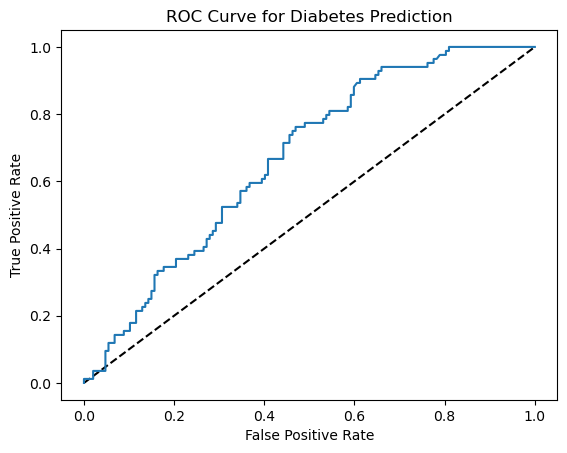

In [24]:
plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.show()

The ROC curve is above the dotted line, so the model performs better than randomly guessing the class of each observation.

## ROC AUC

In [26]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

Calculate and print the ROC AUC score, passing the test labels and the predicted positive class probabilities.

In [27]:
# Calculate roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

0.6687722708130872


In [28]:
# Calculate the confusion matrix
print(confusion_matrix(y_test, y_pred))

[[123  24]
 [ 58  26]]


In [29]:
# Calculate the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.84      0.75       147
           1       0.52      0.31      0.39        84

    accuracy                           0.65       231
   macro avg       0.60      0.57      0.57       231
weighted avg       0.62      0.65      0.62       231



## Hyperparameter tuning with GridSearchCV


Now you have seen how to perform grid search hyperparameter tuning, you are going to build a lasso regression model with optimal hyperparameters to predict blood glucose levels using the features in the diabetes_df dataset.

In [31]:
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [35]:
import numpy as np
from sklearn.linear_model import Lasso

for alpha in np.linspace(0.00001, 1, 20):
    lasso = Lasso(alpha=alpha)

In [36]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

Set up a parameter grid for "alpha", using np.linspace() to create 20 evenly spaced values ranging from 0.00001 to 1.

In [37]:
# Set up the parameter grid
param_grid = {"alpha": np.linspace(0.00001, 1, 20)}

Call GridSearchCV(), passing lasso, the parameter grid, and setting cv equal to kf.

In [38]:
# Instantiate lasso_cv
lasso_cv = GridSearchCV(lasso, param_grid, cv=kf)

Fit the grid search object to the training data to perform a cross-validated grid search.

In [40]:
# Fit to the training data
lasso_cv.fit(X_train,y_train)
print("Tuned lasso paramaters: {}".format(lasso_cv.best_params_))
print("Tuned lasso score: {}".format(lasso_cv.best_score_))

Tuned lasso paramaters: {'alpha': 1e-05}
Tuned lasso score: 0.15374635291664887


Using the optimal hyperparameters does not guarantee a high performing model!

## Hyperparameter tuning with RandomizedSearchCV


As you saw, GridSearchCV can be computationally expensive, especially if you are searching over a large hyperparameter space. In this case, you can use RandomizedSearchCV, which tests a fixed number of hyperparameter settings from specified probability distributions.

Create params, adding "l1" and "l2" as penalty values, setting C to a range of 50 float values between 0.1 and 1.0, and class_weight to either "balanced" or a dictionary containing 0:0.8, 1:0.2.

In [41]:
from sklearn.model_selection import RandomizedSearchCV

In [42]:
# Create the parameter space
params = {"penalty": ["l1", "l2"],
         "tol": np.linspace(0.0001, 1.0, 50),
         "C": np.linspace(0.1, 1.0, 50),
         "class_weight": ["balanced", {0:0.8, 1:0.2}]}

Create the Randomized Search CV object, passing the model and the parameters, and setting cv equal to kf.

In [43]:
# Instantiate the RandomizedSearchCV object
logreg_cv = RandomizedSearchCV(logreg, params, cv=kf)

In [44]:
# Fit the data to the model
logreg_cv.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Valu

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=LogisticRegression(),
                   param_distributions={'C': array([0.1       , 0.11836735, 0.13673469, 0.15510204, 0.17346939,
       0.19183673, 0.21020408, 0.22857143, 0.24693878, 0.26530612,
       0.28367347, 0.30204082, 0.32040816, 0.33877551, 0.35714286,
       0.3755102 , 0.39387755, 0.4122449 , 0.43061224, 0.44897959,
       0.46734...
       4.89846939e-01, 5.10253061e-01, 5.30659184e-01, 5.51065306e-01,
       5.71471429e-01, 5.91877551e-01, 6.12283673e-01, 6.32689796e-01,
       6.53095918e-01, 6.73502041e-01, 6.93908163e-01, 7.14314286e-01,
       7.34720408e-01, 7.55126531e-01, 7.75532653e-01, 7.95938776e-01,
       8.16344898e-01, 8.36751020e-01, 8.57157143e-01, 8.77563265e-01,
       8.97969388e-01, 9.18375510e-01, 9.38781633e-01, 9.59187755e-01,
       9.79593878e-01, 1.00000000e+00])})

In [45]:
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Best Accuracy Score: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'tol': 0.9183755102040816, 'penalty': 'l2', 'class_weight': {0: 0.8, 1: 0.2}, 'C': 0.2469387755102041}
Tuned Logistic Regression Best Accuracy Score: 0.6666493596400138


Even without exhaustively trying every combination of hyperparameters, the model has an accuracy of over 70% on the test set! So far we have worked with clean datasets; however, in the next chapter, we will discuss the steps required to transform messy data before building supervised learning models.